Программа повышения квалификации (научно-педагогических) работников НИУ ВШЭ

# Python для исследователей

Автор: *Татьяна Рогович, НИУ ВШЭ*

## Работа с файлами в Python: чтение и запись текстовых файлов. Исключения. Try/except

## Файловый ввод-вывод
Мы начинаем работать с файлами. Сейчас будем обсуждать только чтение и запись. О том, как запускать файлы на исполнение, отдельная история. Также для начала речь пойдёт о текстовых файлах или похожих на текстовые (например, код на Python или CSV-файл будет текстовым).

Как правило, если указать в Python не полный путь к файлу, а только его название, то он будет искать файл в рабочей директории. Как узнать, где это?


In [2]:
import os
os.getcwd()

'C:\\@Rogovich\\@PythonData\\2019_2020_HSE\\2020_DPO_PythonProg\\6_Sorting_Files'

Функция getcwd() из модуля os возвращает нам путь к вашей рабочей папке. Так, например, в Windows по умолчанию Anaconda делает рабочей папкой для Jupyter папку пользователя в Users. если вы создали блокнот в какой-то другой папке - по умолчанию его директория и будет рабочей. Это можно изменить или глобально, прописав путь к вашей папке в свойствах, или локально в рамках сессии.

Функция chdir() принимает в качестве аргумента путь к папке и меняет рабочую директорию. Теперь к файлам, хранящимся в ней вы сможете обращаться без полного пути. Также все новые файлы будут сохраняться туда же.

In [3]:
os.chdir('C:\\@Rogovich\\@PythonData\\2019_2020_HSE\\2020_DPO_PythonProg\\6_Sorting_Files')
os.getcwd()

'C:\\@Rogovich\\@PythonData\\2019_2020_HSE\\2020_DPO_PythonProg\\6_Sorting_Files'

.listdir() вернет нам список содержимого директории. Очень полезная функция - можно запустить цикл, если нужно обработать все файлы в папке.

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '2020_DPO_6_1_O_notation_sorting.ipynb',
 '2020_DPO_6_2_Files.ipynb',
 '2020_DPO_6_3_Html_Intro.ipynb',
 '2020_DPO_6_4_BS_Tables.ipynb',
 'html1.png',
 'html2.png',
 'html3.png',
 'html4.png',
 'html5.png',
 'mbox.txt',
 'nuclear.csv',
 'simple_table.html',
 'table.csv',
 'test.txt']

Давайте попробуем создать файл, записать в него что-нибудь и сохранить.

In [13]:
f = open("test.txt", 'w', encoding='utf8')

Функция open() возвращает файловый объект и мы используем ее обычно с двумя аргументами - имя файла и режим (например, запись или чтение). Выше мы открыли файл test.txt в режиме записи 'w' (если такого файла не существовало, он будет создан).

Такой объект называется file handle или дескриптор файла.

![](https://www.py4e.com/images/handle.svg)  
Source: https://www.py4e.com/html3/07-files

Какие могут быть режимы открытия файла (mode):

* 'r' - read, только чтение
* 'w' - write, только запись (если файл с таким именем существовал, он будет удален).
* 'a' - append, новые данные будут записаны в конец файла
* 'r+' - чтение+запись.

Если не передать второй аргумент, то файл автоматически откроется в режиме чтения.

Encoding - именнованный параметр, если работаете с кириллицей или языками со спецсимволами, то лучше задать utf8.

In [14]:
f.write('Hello, world!')
f.close()

Метод write записал данные в наш файл. После этого файл нужно закрыть, чтобы он выгрузился из оперативной памяти. Если этого не сделать, то в какой-то момент питоновский сборщик мусора все равно до него доберется и закроет файл, но большие файлы могут съедать достаточно много ресурсов, поэтому лучше за этим следить.

Теперь дававайте попробуем открыть в режиме чтения.

In [15]:
f = open("test.txt", 'r', encoding='utf8')
print(f.read())
f.close()

Hello, world!


После того, как мы закрыли файл, обратиться к нему больше нельзя.

In [16]:
f.read()

ValueError: I/O operation on closed file.

Хорошим тоном при работе с файлами считается открывать их с помощью ключевого слова with. Преимущество этого способа в том, что файл закроется автоматически, когда закончатся вложенные операции.

In [17]:
with open('test.txt') as f: # открыли файл, не указали режим, по умолчанию - чтение
    read_data = f.read() # считали данные из файла в переменную
# операции закончились, файл сам закрылся

In [18]:
print(read_data)

Hello, world!


А теперь попробуем записать в файл новые строки.

In [20]:
with open('test.txt', 'a') as f: # открыли файл
    f.write('\n Is this an african swallow?\n Or an european swallow?') # дозаписали строки в файл

Еще один вариант записать данные в файл вот так:

In [21]:
with open('test.txt', 'a') as f:
    print("\nAnd another string", file = f)

In [22]:
with open('test.txt') as f: 
    print(f.read())

Hello, world!
 Is this an african swallow?
 Or an european swallow?
 Is this an african swallow?
 Or an european swallow?
And another string



Мы выше уже видели два метода файла .write() и .read(). Еще один метод, который очень часто используется - это readline. Он позволяет не загружать файл целиком в память, а считывать его построчно. Знаком остановки здесь будет выступать \n

In [23]:
f = open('test.txt', 'r')
f.readline()

'Hello, world!\n'

In [24]:
f.readline()

' Is this an african swallow?\n'

.readline() - генератор. При обращении он выдает нам новую строку. 

In [25]:
f.readline() # вызвали третий раз

' Or an european swallow?\n'

In [26]:
f.close()

Также, чтобы прочитать все строки поочередно, можно запустить цикл. Тут не стоит забывать, что переменная f, хоть и прикидывается списком строк, когда мы её итерируем, на самом деле таковым не является. В действительности при открытии файла мы запоминаем позицию, на которой мы этот файл читаем. Изначально она указывает на самое начало файла, но с каждой итерацией сдвигается. Когда мы прочитаем файл целиком, дальнейшие попытки из него что-то прочитать ни к чему не приведут: указатель текущей позиции сдвинулся до самого конца и файл закончился.

In [27]:
f = open('test.txt', 'r')

for line in f:
    print(line, end='')
    
for line in f: # обратите внимание, что этот цикл не выполняется
    print(line, end='')
    
f.close()

Hello, world!
 Is this an african swallow?
 Or an european swallow?
 Is this an african swallow?
 Or an european swallow?
And another string


Файл можно перемотать на начало, если воспользоваться методом .seek(), который возвращается к символу на этой позиции.

In [28]:
f = open('test.txt', 'r')

for line in f:
    print(line, end='')

f.seek(0) # вернули файл на начало    
    
for line in f: # теперь печатает!
    print(line, end='')
    
f.close()

Hello, world!
 Is this an african swallow?
 Or an european swallow?
 Is this an african swallow?
 Or an european swallow?
And another string
Hello, world!
 Is this an african swallow?
 Or an european swallow?
 Is this an african swallow?
 Or an european swallow?
And another string


Если методу read() передать целое число, то питон прочитает только заданное количество символов или битов, если информация в файле записана в бинарном формате.

In [58]:
with open('test.txt') as f: 
    print(f.read(6))

Hello,


Чтобы считать все строки файла в список, можно вызвать список от файлового объекта или использовать метод .readlines().

In [59]:
f = open('test.txt', 'r')
print(list(f))
f.close()

['Hello, world!\n', ' Is this an african swallow?\n', ' Or an european swallow?\n', 'And another string\n']


In [60]:
f = open('test.txt', 'r')
print(f.readlines())
f.close()

['Hello, world!\n', ' Is this an african swallow?\n', ' Or an european swallow?\n', 'And another string\n']


## Пример: чтение файла построчно

Мы с вами уже работали с файлом mbox.txt (тот самый с метаданными переписки). В прошлый раз мы его забирали из интернета и полностью грузили в память. Давайте теперь попробуем прочитать его построчно, тем самым загружая в память по одной строке.

В файле есть строки формата
"Date: Sat, 5 Jan 2008 09:12:18 -0500" - время, когда ушло письмо. Давайте создадим словарик, в который будем сохранять, в каком часу люди пишут письма (час от 0 до 23 - ключ, количество писем, написанных в это время, - значение).

## Try except

In [29]:
with open('mbox.txt') as f:
    for line in f:
        if line.startswith('Date: '):
            print(line)
            break # закомментируйте или удалите break, если хотите увидеть весь вывод.

Date: Sat, 5 Jan 2008 09:12:18 -0500



Увидели, что у каждого письма на самом деле две строки, начинающихся с 'Date: '. Нужно придумать еще одну эвристику. Например, давайте забирать только те, которые заканчиваются скобкой.

In [30]:
with open('mbox.txt') as f:
    for line in f:
        if line.startswith('Date: ') and line.endswith(')\n'):
            print(line)
            break

Date: 2008-01-05 09:12:07 -0500 (Sat, 05 Jan 2008)



Ок, будем работать с этим форматом. Тут можно обойтись без регулярок и доставать данные через двойной split() - сначала по пробелу, а потом по ':'.

In [31]:
with open('mbox.txt') as f:
    for line in f:
        if line.startswith('Date: ') and line.endswith(')\n'):
            print(line.split()[2].split(':')[0])
            break

09


И, наконец, собираем в словарь.

In [32]:
hours = {}

with open('mbox.txt') as f:
    for line in f:
        if line.startswith('Date: ') and line.endswith(')\n'):
            hours[line.split()[2].split(':')[0]] = hours.get(line.split()[2].split(':')[0], 0) + 1
            
for hour in sorted(hours):
    print(f'В {hour} часов было отправлено {hours[hour]} писем')

В 00 часов было отправлено 24 писем
В 01 часов было отправлено 10 писем
В 02 часов было отправлено 13 писем
В 03 часов было отправлено 17 писем
В 04 часов было отправлено 25 писем
В 05 часов было отправлено 11 писем
В 06 часов было отправлено 45 писем
В 07 часов было отправлено 41 писем
В 08 часов было отправлено 78 писем
В 09 часов было отправлено 164 писем
В 10 часов было отправлено 183 писем
В 11 часов было отправлено 149 писем
В 12 часов было отправлено 109 писем
В 13 часов было отправлено 119 писем
В 14 часов было отправлено 152 писем
В 15 часов было отправлено 178 писем
В 16 часов было отправлено 165 писем
В 17 часов было отправлено 96 писем
В 18 часов было отправлено 52 писем
В 19 часов было отправлено 48 писем
В 20 часов было отправлено 29 писем
В 21 часов было отправлено 37 писем
В 22 часов было отправлено 29 писем
В 23 часов было отправлено 16 писем


Мы будем проходить графики отдельным блоком, но давайте быстренько построим распределение отправки писем по времени суток.

Для начала создадим список отсортированных по ключам значений. Функция построения графика будет брать два аргумента - данные для шкал x и y. На x положим отсортированные ключи, а на y, соответствующие им значения.

In [35]:
sorted_values = []
for key in sorted(hours.keys()):
    sorted_values.append(hours[key])

<BarContainer object of 24 artists>

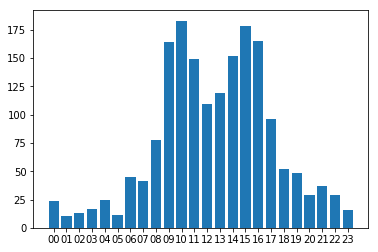

In [36]:
import matplotlib.pyplot as plt # импортировали библиотеку для построения графиков
%matplotlib inline 
# запустили "магическую" функцию, которая будет отображать графики прямо в блокноте

plt.bar(sorted(hours.keys()), sorted_values)

## Немного про исключения

Почти наверняка вы уже делали что-то, что приводило к сообщению об ошибке. Сегодня мы научимся их обрабатывать и писать собственные исключения - наши инструкции для Python, чтобы код не ломался, как только что-то пойдет не так.

Например, мы хотим открывать файл по запросу от пользователя, но хотим обработать случай, когда пользователь введет неправильное название.

In [37]:
fname = input('Введите название файла: ')
fhand = open(fname) # введем название несуществующего файла

FileNotFoundError: [Errno 2] No such file or directory: 'f'

Напишем блок try/except. Try будет исполняться до тех пор, пока что-то не сломается. Как только возникнет ошибка, ваша программа перейдет в часть except и выполнит действие, описанное в ней. Сообщения об ошибке выведено не будет.

In [38]:
fname = input('Enter the file name: ') # передадим валидное название файла

try:
    fhand = open(fname)
    count = 0
    for line in fhand:
        if line.startswith('From '):
            count = count + 1
    fhand.close()
    print('There were', count, 'from lines in', fname)

except:
    print('File cannot be opened:', fname)
    
print('Программа работает')


There were 1797 from lines in mbox.txt
Программа работает


In [39]:
fname = input('Enter the file name: ') # передадим название файла с ошибкой

try:
    fhand = open(fname)
    count = 0
    for line in fhand:
        if line.startswith('From '):
            count = count + 1
    fhand.close()
    print('There were', count, 'from lines in', fname)

except:
    print('File cannot be opened:', fname)
    
print('Программа работает')

File cannot be opened: 2
Программа работает


Except позволил нам избежать ошибки и остановки работы программы, следующая часть исполнена.

Естественно, try-except можно использовать не только с файлами.

In [85]:
try:
    print(y) # переменной y пока не существует
except:
    print("An exception occurred") # нет ошибки

An exception occurred


Но что делать, если мы хотим пропускать только определенный вид ошибок, но видеть сообщения об остальных? Try/except хороший инструмент для отладки кода. Давайте посмотрим, как называется ошибка при попытке вызова неопределенной переменной.

In [87]:
print(y)

NameError: name 'y' is not defined

`NameError: name 'y' is not defined` - название нашей ошибки NameError, давайте обрабатывать его отдельно.

In [40]:
try:
    print(y)
except NameError:
    print("Variable y is not defined")
except:
    print("Something else went wrong")

Variable y is not defined


А теперь давайте попробуем разделить что-нибудь на 0.

In [41]:
try:
    print(10/0)
except NameError:
    print("Variable y is not defined")
except:
    print("Something else went wrong")

Something else went wrong


Если после вывода в except использовать ключевое слово raise, то программа закончит работу ошибкой. Отличие от того, чтобы просто не использовать except для других случаев в том, что до окончания работы программы будет выпонелнено все, что написано внутри except. Сравним.

In [90]:
try:
    print(10/0)
except NameError:
    print("Variable y is not defined")
except:
    print("Something else went wrong")
    raise

Something else went wrong


ZeroDivisionError: division by zero

In [42]:
try:
    print(10/0)
except NameError:
    print("Variable y is not defined")

ZeroDivisionError: division by zero

Except может одновременно обрабатывать несколько исключений.

In [43]:
try:
    print(10/0)
except (NameError, ZeroDivisionError):
    print("Variable y is not defined or someone tried to divide by zero")
except:
    print("Something else went wrong")

Variable y is not defined or someone tried to divide by zero


Except может использоваться с else - будет исполнено, если не было ошибки.

In [44]:
try:
    print(10)
except NameError:
    print("Variable y is not defined")
except:
    print("Something else went wrong")
else:
    print('Nothing went wrong')

10
Nothing went wrong


Еще один важный момент - использование ключевого слова pass. Достаточно часто пригождается при вэб-скрейпинге. Так вы можете заложить воможность того, что данные не придут в нужном формате и, например, не записывать их в ячейку таблицы, а просто пропустить.

In [45]:
try:
    print(10/0)
except NameError:
    print("Variable y is not defined")
except:
    pass # ничего не происходит, но и ошибки нет

Иногда вам может понадобиться создавать свои исключения - персонализированные сообщения об ошибке, которые валидны только для вашей программы.

In [46]:
x = -1

if x < 0:
  raise Exception("Sorry, no numbers below zero")

Exception: Sorry, no numbers below zero

Или же вы можете использовать уже существующие исключения и персонализировать сообщение об ошибке.

In [47]:
x = "hello"

if not type(x) is int:
  raise TypeError("Only integers are allowed")

TypeError: Only integers are allowed

Давайте попробуем решить такую задачу: вы ждете от пользователя на ввод число. Будем запрашивать число до тех пор, пока не добьемся правильного ввода.

In [48]:
while True:
    try:
        x = int(input("Введите число: "))
        break
    except ValueError:
        print("Это было не число. Давайте еще раз.")

Это было не число. Давайте еще раз.
Это было не число. Давайте еще раз.
